### this code can handle two OH group

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
path = "C:/shehani/postdoc_work/ML_Diffusion/md_data/c4_nmeth_frozen_double/"

In [3]:
f=open(path +'/input_data.dat','r')
lines=f.readlines()
for line in lines[0:]:
    data=line.split()
    if data[0]=='nsteps:':
        nsteps = int(data[1])
    if data[0]=='natoms:':
        natoms = int(data[1])
    if data[0]=='nonmvat:':
        nonmvat = int(data[1])
    if data[0]=='nmovingatoms:':
        nmovingatoms = int(data[1])
    if data[0]=='MDRestartFrequency:':
        MDRestartFrequency = int(data[1])
    if data[0]=='dt:':
        dt = float(data[1])
    if data[0]=='noh:':
        noh = int(data[1])
    if data[0]=='nwater:':
        nwater = int(data[1])
    if data[0]=='nox:':
        nox = int(data[1])
    if data[0]=='nhy:':
        nhy = int(data[1])
    if data[0]=='xbox:':
        xbox = float(data[1])
    if data[0]=='ybox:':
        ybox = float(data[1])
    if data[0]=='zbox:':
        zbox = float(data[1])
        
nsteps = int((nsteps/MDRestartFrequency)+1)
nstep = nsteps
        
print('nsteps:','  ',nstep )
print('natoms:','  ',natoms)
print('nonmvat:','  ',nonmvat)
print('nmovingatoms:','  ',nmovingatoms)
print('MDRestartFrequency:','  ',MDRestartFrequency)
print('dt:','  ',dt)
print('noh:','  ',noh)
print('nwater:','  ',nwater)
print('nox:','  ',nox)
print('nhy:','  ',nhy)
print('xbox:','  ',xbox)
print('ybox:','  ',ybox)
print('zbox:','  ',zbox)

nsteps:    1001
natoms:    574
nonmvat:    480
nmovingatoms:    94
MDRestartFrequency:    10
dt:    1.0
noh:    2
nwater:    30
nox:    32
nhy:    62
xbox:    22.797
ybox:    13.392
zbox:    15.0


In [4]:
ox = np.empty(nox,dtype=int)
hy = np.empty(nhy+1,dtype=int)


mm = 0
nn = 1
while mm<(nox):
    ox[mm] = nn+nonmvat
    mm = mm+1
    nn = nn+3
ox[-1] = ox[-1]-1
    
mm = 0
nn =1
while mm<(nhy):
    hy[mm] = nn+nonmvat+1
    hy[mm+1] = nn+nonmvat+2
    mm = mm+2
    nn = nn+3
hy = hy[:-1]
hy[-1] = hy[-1]+1

print(ox)
print(hy)
print(len(ox))
print(len(hy))

[481 484 487 490 493 496 499 502 505 508 511 514 517 520 523 526 529 532
 535 538 541 544 547 550 553 556 559 562 565 568 571 573]
[482 483 485 486 488 489 491 492 494 495 497 498 500 501 503 504 506 507
 509 510 512 513 515 516 518 519 521 522 524 525 527 528 530 531 533 534
 536 537 539 540 542 543 545 546 548 549 551 552 554 555 557 558 560 561
 563 564 566 567 569 570 572 574]
32
62


In [5]:
msd_of_oh1 = np.empty(nstep)
msd_of_oh2 = np.empty(nstep)
atom= ['Non']*(natoms)
x_ox = np.empty(nstep*nox).reshape(nox,nstep)
y_ox = np.empty(nstep*nox).reshape(nox,nstep)
z_ox = np.empty(nstep*nox).reshape(nox,nstep)

x_hy = np.empty(nstep*nhy).reshape(nhy,nstep)
y_hy = np.empty(nstep*nhy).reshape(nhy,nstep)
z_hy = np.empty(nstep*nhy).reshape(nhy,nstep)

x_vel = np.empty(nstep*natoms).reshape(natoms,nstep)
y_vel = np.empty(nstep*natoms).reshape(natoms,nstep)
z_vel = np.empty(nstep*natoms).reshape(natoms,nstep)
charge = np.empty(nstep*natoms).reshape(natoms,nstep)

oh_index = np.empty(nstep)
oh_index2 = np.empty(nstep)

xoh = np.empty(nstep)
yoh = np.empty(nstep)
zoh = np.empty(nstep)

xoh_2 = np.empty(nstep)
yoh_2 = np.empty(nstep)
zoh_2 = np.empty(nstep)

In [6]:
jj=0
kk=0
f=open(path +'/geo_end.xyz','r')
lines=f.readlines()
while jj < nstep:
    io=0
    ih=0
    for line in lines[kk+nonmvat+2:(kk+natoms+2)]:
        data=line.split()
        if len(data)>3:
            if data[0]=='O':
                x_ox[io][jj]=float(data[1])
                y_ox[io][jj]=float(data[2])
                z_ox[io][jj]=float(data[3])
                io = io+1
            elif data[0]=='H':
                x_hy[ih][jj]=float(data[1])
                y_hy[ih][jj]=float(data[2])
                z_hy[ih][jj]=float(data[3])
                ih = ih+1
    kk=kk+natoms+2
    jj=jj+1


In [7]:
def distans(xo,yo,zo,xh,yh,zh):
    distan = np.sqrt((xh-xo)**2+(yh-yo)**2+(zh-zo)**2)
    #print(distan)
    return distan

In [8]:
def cal_msd(x1,y1,z1,x2,y2,z2):
    msd = ((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)
    return msd

In [9]:
msd_of_o = np.empty(nstep*nox).reshape(nox,nstep)
io = 0
while io < nox :
    jj=0
    while jj < nstep :
        msd_of_o[io][jj] = cal_msd(x_ox[io][0],y_ox[io][0],z_ox[io][0],x_ox[io][jj],y_ox[io][jj],z_ox[io][jj])
        jj=jj+1
    io = io+1

In [10]:
x_ox_box = np.empty(nstep*nox).reshape(nox,nstep)
y_ox_box = np.empty(nstep*nox).reshape(nox,nstep)
z_ox_box = np.empty(nstep*nox).reshape(nox,nstep)
x_hy_box = np.empty(nstep*nhy).reshape(nhy,nstep)
y_hy_box = np.empty(nstep*nhy).reshape(nhy,nstep)
z_hy_box = np.empty(nstep*nhy).reshape(nhy,nstep)

x_ox_box = x_ox.copy()
y_ox_box = y_ox.copy()
z_ox_box = z_ox.copy()
x_hy_box = x_hy.copy()
y_hy_box = y_hy.copy()
z_hy_box = z_hy.copy()

In [11]:
# move atoms in to the box.
ii=0
jj=0
while jj < nstep:
    while ii < nox:
        if x_ox_box[ii][jj]>(xbox/2):
            x_ox_box[ii][jj]=x_ox_box[ii][jj]-xbox
        if x_ox_box[ii][jj]<(-xbox/2):
            x_ox_box[ii][jj]=x_ox_box[ii][jj]+xbox
            
        if y_ox_box[ii][jj]>(ybox/2):
            y_ox_box[ii][jj]=y_ox_box[ii][jj]-ybox
        if y_ox_box[ii][jj]<(-ybox/2):
            y_ox_box[ii][jj]=y_ox_box[ii][jj]+ybox
        ii=ii+1
    jj=jj+1
    
ii=0
jj=0
while jj < nstep:
    while ii < nhy:
        if x_hy_box[ii][jj]>(xbox/2):
            x_hy_box[ii][jj]=x_hy_box[ii][jj]-xbox
        if x_hy_box[ii][jj]<(-xbox/2):
            x_hy_box[ii][jj]=x_hy_box[ii][jj]+xbox
            
        if y_hy_box[ii][jj]>(ybox/2):
            y_hy_box[ii][jj]=y_hy_box[ii][jj]-ybox
        if y_hy_box[ii][jj]<(-ybox/2):
            y_hy_box[ii][jj]=y_hy_box[ii][jj]+ybox
        ii=ii+1
    jj=jj+1

In [12]:
xperiodic_ox = np.append(x_ox_box,x_ox_box,axis=0) # original and 1
xperiodic_ox = np.append(xperiodic_ox,(x_ox_box+xbox),axis=0) #2
xperiodic_ox = np.append(xperiodic_ox,(x_ox_box+xbox),axis=0) #3
xperiodic_ox = np.append(xperiodic_ox,(x_ox_box+xbox),axis=0) #4
xperiodic_ox = np.append(xperiodic_ox,x_ox_box,axis=0)  #5
xperiodic_ox = np.append(xperiodic_ox,(x_ox_box-xbox),axis=0) #6
xperiodic_ox = np.append(xperiodic_ox,(x_ox_box-xbox),axis=0) #7
xperiodic_ox = np.append(xperiodic_ox,(x_ox_box-xbox),axis=0) #8

yperiodic_ox = np.append(y_ox_box,(y_ox_box+ybox),axis=0) # original and 1
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box+ybox),axis=0) #2
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box),axis=0) #3
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box-ybox),axis=0) #4
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box-ybox),axis=0) #5
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box-ybox),axis=0) #6
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box),axis=0) #7
yperiodic_ox = np.append(yperiodic_ox,(y_ox_box+ybox),axis=0) #8

zperiodic_ox = (z_ox_box,z_ox_box,z_ox_box,z_ox_box,z_ox_box,z_ox_box,z_ox_box,z_ox_box,z_ox_box)
zperiodic_ox = np.concatenate(zperiodic_ox)

periodic_ox=(ox,ox,ox,ox,ox,ox,ox,ox,ox)
periodic_ox=np.concatenate(periodic_ox)

In [13]:
def water(xo,yo,zo,xh,yh,zh,hy,periodic_ox,nox,nhy):
    jj=0
    rij= np.empty(nhy*nox*9).reshape(nhy,nox*9)
    while jj < nhy:
        ii=0
        while ii < (nox*9):
            rij[jj][ii]=distans(xo[ii],yo[ii],zo[ii],xh[jj],yh[jj],zh[jj])
            ii = ii+1
        jj = jj+1
        
    hoatm = np.empty(nhy*2,dtype=int).reshape(nhy,2)
    wht = np.empty(nox*6,dtype=int).reshape(nox,6)
    hoatm[:][:]=0
    wht[:][:]=0
    j=0 
    while j<nhy:#go over H 
        hh = rij[j][0]
        hoatm[j][0] = hy[j]
        hoatm[j][1] = periodic_ox[0]
        i=1
        while i<(nox*9): #go over in periodic box
            if rij[j][i]<hh: #find shotest bond
                hoatm[j][1] = periodic_ox[i]
                hh = rij[j][i]
            i=i+1
        j=j+1
    nn=0
    while nn<nox:
        wht[nn][0]= periodic_ox[nn]
        mm=0
        kk=1
        while mm<nhy:
            if hoatm[mm][1]==periodic_ox[nn]:
                wht[nn][kk] = hoatm[mm][0]
                kk=kk+1
            mm=mm+1
        nn=nn+1
    return wht

In [14]:
def find_oh(wht,nox,noh):
    wht = wht.astype(int)
    iioh = np.empty(noh)
    iioh = iioh.astype(int)
    nn=0
    iik = 0
    more_oh = 0
    #iioh = 1
    while nn<nox:
        if wht[nn][2]==0:
            iioh[iik] = wht[nn][0]
            iik = iik+1
            more_oh = more_oh+1
        if wht[nn][1]==0:
            print('O atom found')
        if wht[nn][3]>0:
            print('H3O+ found')
        nn=nn+1
    if more_oh>noh:
            print('morre than one oh')
    return iioh

In [15]:
ll=0
while ll<nstep:
    xo = [sub[ll] for sub in xperiodic_ox]
    yo = [sub[ll] for sub in yperiodic_ox]
    zo = [sub[ll] for sub in zperiodic_ox]
    xh = [sub[ll] for sub in x_hy_box]
    yh = [sub[ll] for sub in y_hy_box]
    zh = [sub[ll] for sub in z_hy_box]
    wht = water(xo,yo,zo,xh,yh,zh,hy,periodic_ox,nox,nhy)
    ioh = find_oh(wht,nox,noh)
    
    koh1,=np.where(ox == ioh[0])
    koh2,=np.where(ox == ioh[1])
    joh1=koh1[0]
    joh2=koh2[0]
       
    if ll>0:
        if (ioh[0]==ioh_old[1]) or(ioh[1]==ioh_old[0]):
            hhh = ioh[0].copy()
            ioh[0] = ioh[1].copy()
            ioh[1] = hhh.copy()
            koh1,=np.where(ox == ioh[0])
            koh2,=np.where(ox == ioh[1])
            joh1=koh1[0]
            joh2=koh2[0]
            
        if ioh[0]!=ioh_old[0]:
            ohh, = np.where(wht == ioh_old[0])[0]
            h11 = wht[ohh][1] #h1 on old oh1
            h12 = wht[ohh][2] #h2 on old oh1
            if h11 == wht_old[ohh][1]: # find jumped H
                jmpd_oh = h12
            else:
                jmpd_oh = h11
            joh1, = np.where(wht_old == jmpd_oh)[0]
            ioh[0] = ox[joh1]

            #print(ohh,h11,h12,jmpd_oh)
            #print(wht_old)
            #print(wht)
        
        if ioh[1]!=ioh_old[1]:
            ohh, = np.where(wht == ioh_old[1])[0]
            h21 = wht[ohh][1] #h1 on old oh2
            h22 = wht[ohh][2] #h2 on old oh2
            if h21 == wht_old[ohh][1]: # find jumped H
                jmpd_oh = h22
            else:
                jmpd_oh = h21
            joh2, = np.where(wht_old == jmpd_oh)[0]
            ioh[1] = ox[joh2]
            
            if ll == 883:
                print('l3')

            #print(ohh,h21,h22,jmpd_oh)
            #print(wht_old)
            #print(wht)

  
    wht_old=wht
    ioh_old=ioh
          
    if ll==0:
        xoh1 = x_ox[joh1][0]
        yoh1 = y_ox[joh1][0]
        zoh1 = z_ox[joh1][0]
        xoh2 = x_ox[joh2][0]
        yoh2 = y_ox[joh2][0]
        zoh2 = z_ox[joh2][0]
        x_old1 = x_ox[joh1][ll]
        y_old1 = y_ox[joh1][ll]
        x_old2 = x_ox[joh2][ll]
        y_old2 = y_ox[joh2][ll]
        
    xmv1 = 'no_x1'
    ymv1 = 'no_y1'
    xmv2 = 'no_x2'
    ymv2 = 'no_y2'
    
    print(ll,ioh[0],x_ox[joh1][ll],y_ox[joh1][ll],z_ox[joh1][ll],ioh[1],x_ox[joh2][ll],y_ox[joh2][ll],z_ox[joh2][ll],"OH")
    
# if OH are mixed up chenge the OH    
    if ((x_ox[joh1][ll]-x_old1)**2+(y_ox[joh1][ll]-y_old1)**2)>16 and ((x_ox[joh2][ll]-x_old2)**2+(y_ox[joh2][ll]-y_old2)**2)>16:
        swich = joh1
        joh1 = joh2
        joh1 = swich
        ioh[0] = ox[joh1]
        ioh[1] = ox[joh2]
        print('-------------swich OH---------------------------')
        
    x_old1 = x_ox[joh1][ll]
    y_old1 = y_ox[joh1][ll]
    x_old2 = x_ox[joh2][ll]
    y_old2 = y_ox[joh2][ll]
    
    
    xoh[ll] = x_ox[joh1][ll]
    yoh[ll] = y_ox[joh1][ll]
    zoh[ll] = z_ox[joh1][ll]
    
    xoh_2[ll] = x_ox[joh2][ll]
    yoh_2[ll] = y_ox[joh2][ll]
    zoh_2[ll] = z_ox[joh2][ll]
    
    
    oh_index[ll] = ioh[0]
    if (oh_index[ll]==oh_index[(ll-20)]) and (oh_index[ll]!=oh_index[(ll-1)]): # remove rattaling
        xmv = 'no'
        ymv = 'no'
        llk = ll-19
        kohk,=np.where(ox == oh_index[ll])
        johk=kohk[0]
        print('rattaling')
        while llk<ll:
            xoh[llk] = x_ox[johk][llk]
            yoh[llk] = y_ox[johk][llk]
            zoh[llk] = z_ox[johk][llk]
            oh_index[llk] = oh_index[ll]
                
            print('{:<6d}'.format(llk),'{:<6d}'.format(int(oh_index[llk])),'{0: >#016.8f}'.format(xoh[llk]),'{0: >#016.8f}'.format(yoh[llk]),'{0: >#016.8f}'.format(zoh[llk]),xmv,ymv)  
            llk = llk+1
        x_old = xoh[llk-1]
        y_old = yoh[llk-1]
        print('rattaling done')
        
        

    if (oh_index[ll]==oh_index[(ll-5)]) and (oh_index[ll]!=oh_index[(ll-1)]): # remove rattaling just after hopping
        xmv = 'no'
        ymv = 'no'
        llk = ll-4
        kohk,=np.where(ox == oh_index[ll])
        johk=kohk[0]
        print('rattaling2')
        while llk<ll:
            xoh[llk] = x_ox[johk][llk]
            yoh[llk] = y_ox[johk][llk]
            zoh[llk] = z_ox[johk][llk]
            oh_index[llk] = oh_index[ll]
                
            print('{:<6d}'.format(llk),'{:<6d}'.format(int(oh_index[llk])),'{0: >#016.8f}'.format(xoh[llk]),'{0: >#016.8f}'.format(yoh[llk]),'{0: >#016.8f}'.format(zoh[llk]),xmv,ymv)  
            llk = llk+1
        x_old = xoh[llk-1]
        y_old = yoh[llk-1]
        print('rattaling2 done')        
    

    
    oh_index2[ll] = ioh[1]
    if (oh_index2[ll]==oh_index2[(ll-20)]) and (oh_index2[ll]!=oh_index2[(ll-1)]): # remove rattaling
        xmv = 'no'
        ymv = 'no'
        llk = ll-19
        kohk,=np.where(ox == oh_index2[ll])
        johk=kohk[0]
        print('rattaling')
        while llk<ll:
            xoh_2[llk] = x_ox[johk][llk]
            yoh_2[llk] = y_ox[johk][llk]
            zoh_2[llk] = z_ox[johk][llk]
            oh_index2[llk] = oh_index2[ll]
                
            print('{:<6d}'.format(llk),'{:<6d}'.format(int(oh_index2[llk])),'{0: >#016.8f}'.format(xoh_2[llk]),'{0: >#016.8f}'.format(yoh_2[llk]),'{0: >#016.8f}'.format(zoh_2[llk]),xmv,ymv)  
            llk = llk+1
        x_old = xoh_2[llk-1]
        y_old = yoh_2[llk-1]
        print('rattaling done')
        
        

    if (oh_index2[ll]==oh_index2[(ll-5)]) and (oh_index2[ll]!=oh_index2[(ll-1)]): # remove rattaling just after hopping
        xmv = 'no'
        ymv = 'no'
        llk = ll-4
        kohk,=np.where(ox == oh_index2[ll])
        johk=kohk[0]
        print('rattaling2')
        while llk<ll:
            xoh_2[llk] = x_ox[johk][llk]
            yoh_2[llk] = y_ox[johk][llk]
            zoh_2[llk] = z_ox[johk][llk]
            oh_index2[llk] = oh_index2[ll]
                
            print('{:<6d}'.format(llk),'{:<6d}'.format(int(oh_index2[llk])),'{0: >#016.8f}'.format(xoh_2[llk]),'{0: >#016.8f}'.format(yoh_2[llk]),'{0: >#016.8f}'.format(zoh_2[llk]),xmv,ymv)  
            llk = llk+1
        x_old = xoh_2[llk-1]
        y_old = yoh_2[llk-1]
        print('rattaling2 done')        
    
# check OH swap

    if (oh_index[ll]==oh_index2[(ll-20)]):
        f=open(path +'/Error_oh.dat','w')
        print('OH1 and OH2 can be missed labeled',file =f)
        print('---------------------------------------')
        


#    print('{:<4d}'.format(ll),'{:<5d}'.format(ioh[0]),'{:<2d}'.format(joh1),'{0: >#010.6f}'.format(x_ox[joh1][ll]),'{0: >#010.6f}'.format(y_ox[joh1][ll]),'{0: >#010.6f}'.format(z_ox[joh1][ll]),'  ',xmv1,ymv1,'  ','{:<5d}'.format(ioh[1]),'{:<2d}'.format(joh2),'{0: >#010.6f}'.format(x_ox[joh2][ll]),'{0: >#010.6f}'.format(y_ox[joh2][ll]),'{0: >#010.6f}'.format(z_ox[joh2][ll]),'  ',xmv2,ymv2)

    ll=ll+1

C:\Users\User\AppData\Local\Temp\ipykernel_36540\2096872368.py:4: RuntimeWarning: invalid value encountered in cast
  iioh = iioh.astype(int)


0 481 -0.44358876 -0.67930477 -0.99611366 508 10.0884997 -2.8477563 1.76078876 OH
1 481 -0.46103596 -0.6212819 -1.00792449 508 10.09169654 -2.89702754 1.74313212 OH
2 481 -0.43317483 -0.57955448 -1.04599888 508 10.10048646 -2.91759908 1.69522151 OH
3 481 -0.38174437 -0.53850349 -1.09849792 508 10.11628996 -2.90601528 1.64404127 OH
4 481 -0.33980058 -0.48379171 -1.17353097 508 10.12927261 -2.88970585 1.61255646 OH
5 481 -0.32413617 -0.4174564 -1.24489717 508 10.15232406 -2.9059824 1.60393935 OH
6 481 -0.31585561 -0.34753123 -1.28469743 508 10.16777152 -2.96385013 1.63090065 OH
7 481 -0.30726383 -0.26871495 -1.27560324 508 10.15801764 -3.03877445 1.68853782 OH
8 481 -0.32627833 -0.19972654 -1.26373605 508 10.13008097 -3.09614404 1.73375496 OH
9 481 -0.38075623 -0.14320067 -1.34630028 508 10.08296863 -3.12919506 1.74798522 OH
10 481 -0.46031974 -0.10097407 -1.43324985 508 10.02658958 -3.13728975 1.76346571 OH
11 481 -0.52200628 -0.05557453 -1.48806779 508 9.95381548 -3.11705227 1.79993429

207 530 -5.54923908 -4.72573441 3.51773612 485 -0.15710777 3.98034756 4.05779882 OH
rattaling
188    485          0.07792659       4.09606692       3.99472855 no no
189    485          0.10382252       4.07989365       3.96212171 no no
190    485          0.13051218       4.06647539       3.90915519 no no
191    485          0.14948002       4.05688736       3.87487338 no no
192    485          0.14962586       4.06310001       3.86161218 no no
193    485          0.11715266       4.05367967       3.85020046 no no
194    485          0.03376964       4.02863931       3.86195754 no no
195    485         -0.03945479       3.98844132       3.87115730 no no
196    485         -0.08253940       3.95950260       3.88522455 no no
197    485         -0.08537892       3.95645644       3.89763470 no no
198    485         -0.08479843       3.96958141       3.88184802 no no
199    485         -0.11210452       3.99628515       3.86807168 no no
200    485         -0.12091635       4.02237573       

233 530 -6.37055345 -4.1966427 3.58816707 485 -0.30148607 4.05866277 4.54175493 OH
234 530 -6.4137234 -4.1984307 3.62502174 485 -0.28697435 4.03688756 4.50683406 OH
235 530 -6.44737892 -4.19473525 3.6732975 485 -0.29739073 3.98246819 4.46872593 OH
236 530 -6.49835657 -4.17109027 3.72494696 485 -0.33642465 3.92827927 4.4309159 OH
237 530 -6.56246531 -4.13728293 3.73403198 485 -0.39942298 3.88939687 4.40240553 OH
238 530 -6.62231004 -4.09051242 3.69425379 485 -0.44845792 3.85603226 4.39493415 OH
239 530 -6.6656157 -4.06355948 3.62033672 485 -0.47205528 3.83061855 4.38392023 OH
240 530 -6.68471506 -4.08658421 3.54151646 485 -0.49003881 3.84873468 4.34190562 OH
241 530 -6.70985856 -4.11975594 3.49780989 485 -0.50037557 3.91334011 4.26576383 OH
242 452 -4.55628313 -3.18779667 4.15683242 485 -0.50611132 3.9960539 4.17067322 OH
243 530 -6.75106347 -4.16786721 3.53338676 485 -0.50441711 4.07170226 4.06699124 OH
rattaling
224    530         -5.94126637      -4.35905513       3.61560857 no no
22

263 530 -6.91698373 -4.3821744 3.39544517 485 -1.45935649 5.00000485 3.99868682 OH
rattaling
244    530         -6.79850945      -4.16632215       3.58341525 no no
245    530         -6.82690242      -4.15615477       3.63081692 no no
246    530         -6.87553441      -4.14712930       3.69985449 no no
247    530         -6.92889366      -4.14810072       3.78440159 no no
248    530         -6.98002060      -4.16187872       3.85428530 no no
249    530         -7.02388717      -4.13325629       3.88954631 no no
250    530         -7.03307261      -4.07690886       3.90407074 no no
251    530         -6.99051222      -4.04251921       3.91894012 no no
252    530         -6.93174682      -4.04582261       3.93479935 no no
253    530         -6.89650647      -4.05803449       3.92924111 no no
254    530         -6.86511034      -4.06723882       3.87858983 no no
255    530         -6.87119279      -4.08474825       3.80615112 no no
256    530         -6.89556491      -4.09816409       3

297 530 -7.27906743 -4.33330096 3.71111497 485 -1.88526741 4.88808552 4.83951733 OH
298 530 -7.23694127 -4.31804733 3.66516389 485 -1.79560465 4.84763598 4.80915849 OH
299 530 -7.19977228 -4.28234267 3.62755968 485 -1.69278914 4.78577556 4.76409993 OH
300 530 -7.21417081 -4.23012277 3.5968315 485 -1.62588184 4.69890146 4.68757786 OH
301 530 -7.24982564 -4.17478735 3.5621246 485 -1.61837735 4.61545674 4.59017021 OH
302 530 -7.28755112 -4.11969785 3.52289826 485 -1.62361688 4.54871952 4.48950783 OH
303 530 -7.32853901 -4.07735081 3.50638843 485 -1.61312176 4.47943997 4.41762518 OH
304 530 -7.3560167 -4.05028607 3.50789011 485 -1.58248144 4.40084516 4.37660301 OH
305 530 -7.37874863 -4.03822103 3.51923281 485 -1.49995277 4.3256503 4.37222329 OH
306 530 -7.40831178 -4.01126205 3.52778678 485 -1.37354166 4.24096929 4.39451549 OH
307 530 -7.44937194 -3.97399703 3.5326782 485 -1.26758224 4.15703448 4.39412136 OH
308 530 -7.48549856 -3.93883768 3.54971745 485 -1.22342128 4.08390045 4.33755441 

386 530 -8.37138611 -5.51455327 4.1782927 485 -1.49634146 5.59203897 3.93469723 OH
387 530 -8.37688216 -5.47988097 4.16807339 485 -1.54371567 5.58326013 3.92707494 OH
388 530 -8.41233439 -5.46736668 4.14060208 485 -1.53851151 5.56983175 3.92597575 OH
389 530 -8.45895895 -5.49000559 4.08606954 485 -1.50738282 5.53318891 3.92506776 OH
390 530 -8.49111181 -5.53930886 4.0399726 485 -1.46581608 5.4952477 3.93780531 OH
391 530 -8.50046247 -5.58577293 4.01567978 485 -1.45033221 5.51556563 3.97968867 OH
392 530 -8.52942837 -5.59713291 4.0024011 485 -1.47114504 5.59331338 4.05176349 OH
393 530 -8.57570559 -5.56860362 3.98862696 485 -1.52285122 5.67785105 4.11530302 OH
394 530 -8.6096795 -5.51868524 3.98386154 485 -1.58436263 5.71025752 4.14919402 OH
395 530 -8.65118065 -5.49295654 3.98511191 485 -1.63497568 5.71596125 4.15830627 OH
396 530 -8.6746276 -5.5225743 3.98940322 485 -1.66566757 5.73628377 4.18159296 OH
397 530 -8.66459497 -5.58674804 4.00395221 485 -1.66395166 5.76498944 4.21964939 OH

468 530 -9.31324081 -4.03713256 3.91957106 485 -0.37598097 6.93387406 3.93988216 OH
469 530 -9.31979398 -4.06771974 3.92162876 485 -0.32995257 6.95179223 3.97148423 OH
470 530 -9.33715679 -4.08571671 3.93461184 485 -0.35382979 6.93115842 4.0104421 OH
471 530 -9.38070726 -4.09019671 3.9634527 485 -0.40898885 6.88647428 4.03970493 OH
472 530 -9.45406487 -4.09155054 4.00186034 485 -0.46127224 6.82712683 4.07211899 OH
473 530 -9.52978652 -4.08874679 4.03785074 485 -0.50983441 6.75504384 4.13104705 OH
474 530 -9.57824074 -4.08142226 4.09598504 485 -0.54969717 6.67648992 4.16966936 OH
475 530 -9.59199624 -4.07390281 4.18148869 485 -0.56275277 6.59021701 4.18240679 OH
476 530 -9.59241769 -4.07440387 4.27072895 485 -0.53245931 6.53498448 4.18202751 OH
477 530 -9.60891459 -4.08087648 4.33497146 485 -0.47511593 6.51931737 4.15596261 OH
478 530 -9.64220392 -4.10229403 4.37410547 485 -0.43924592 6.52126187 4.1213221 OH
479 530 -9.67037394 -4.12928276 4.39349694 485 -0.45963215 6.50824247 4.0750874

568 530 -10.06365318 -5.63419575 3.65861197 485 -0.69929912 6.26970196 4.456843 OH
569 530 -10.09888401 -5.64933887 3.66958189 485 -0.67947175 6.33223459 4.45789089 OH
570 530 -10.13168226 -5.64296582 3.68968425 485 -0.63474631 6.39962235 4.42967856 OH
571 530 -10.16522391 -5.63721336 3.7112512 485 -0.60291027 6.4505019 4.41658855 OH
572 530 -10.1953406 -5.64865573 3.71994022 485 -0.58683601 6.49695452 4.41326499 OH
573 530 -10.19605553 -5.6524608 3.71560192 485 -0.5909618 6.53335796 4.45242716 OH
574 530 -10.18400597 -5.66388476 3.70401888 485 -0.59935109 6.56568872 4.51124826 OH
575 530 -10.17137169 -5.69364597 3.70286858 485 -0.60426026 6.61592591 4.56647165 OH
576 530 -10.14398724 -5.75011598 3.67983823 485 -0.5689905 6.65258245 4.57895712 OH
577 530 -10.0830293 -5.80194718 3.64072349 485 -0.50208584 6.67041613 4.5530343 OH
578 530 -10.01968178 -5.82772627 3.61418618 485 -0.43428814 6.69460272 4.52153191 OH
579 530 -9.97344851 -5.83088414 3.60958942 485 -0.39491369 6.75582465 4.514

667 530 -9.8244111 -4.29683403 3.59885984 485 0.28793654 5.8573284 4.33786671 OH
668 530 -9.78929961 -4.26932335 3.58973801 485 0.29650431 5.88167687 4.31083979 OH
669 530 -9.7709146 -4.20734429 3.60525863 485 0.30604097 5.8887589 4.29655632 OH
670 530 -9.76192902 -4.11546152 3.63615471 485 0.32059665 5.86996723 4.27713321 OH
671 530 -9.76996923 -4.03168201 3.64954431 485 0.32810969 5.84072893 4.24460264 OH
672 530 -9.79422052 -3.99244976 3.6413292 485 0.32510004 5.82686276 4.2080598 OH
673 530 -9.83136451 -3.99936544 3.6292928 485 0.31333899 5.81114855 4.16504163 OH
674 530 -9.83883849 -4.04484472 3.63116104 485 0.27375349 5.76976608 4.13755582 OH
675 530 -9.79867849 -4.10359011 3.64446421 485 0.21406976 5.70697912 4.11477265 OH
676 530 -9.72091454 -4.14248591 3.63953441 485 0.17475493 5.65008552 4.09359992 OH
677 530 -9.63073004 -4.11710537 3.61551553 485 0.17717967 5.62280551 4.06942053 OH
678 530 -9.57637081 -4.03025047 3.60660815 485 0.1762015 5.6080919 4.0613606 OH
679 530 -9.601

728 530 -8.98282017 -4.80223893 4.06722962 485 0.76128798 6.62316831 3.90341081 OH
rattaling
709    485          0.34934394       6.07168869       3.73220028 no no
710    485          0.39193727       6.03005320       3.71204385 no no
711    485          0.40121258       6.01208061       3.71408803 no no
712    485          0.40953632       6.04811895       3.72334167 no no
713    485          0.41577848       6.12284871       3.72827627 no no
714    485          0.42339367       6.21361651       3.72997247 no no
715    485          0.44526057       6.29253701       3.73564684 no no
716    485          0.48793533       6.34970146       3.74280376 no no
717    485          0.54015500       6.37237543       3.73405432 no no
718    485          0.57224026       6.37966502       3.71097536 no no
719    485          0.57336230       6.37162625       3.69691361 no no
720    485          0.56900010       6.37535009       3.70538023 no no
721    485          0.58790215       6.40984917       3

745 530 -8.58884415 -4.64680449 4.19509827 485 0.75632051 6.97049361 4.23833219 OH
746 530 -8.58891633 -4.63937396 4.16562534 485 0.73930541 7.03241767 4.24757958 OH
747 530 -8.60799229 -4.64607996 4.15053166 485 0.74875387 7.08745552 4.23977046 OH
748 530 -8.63400961 -4.66639535 4.12926177 485 0.78885932 7.09467527 4.20700716 OH
749 530 -8.66285988 -4.68920508 4.10472517 485 0.82129859 7.07898264 4.17264503 OH
750 530 -8.68773037 -4.69685878 4.07317199 485 0.82258846 7.07508319 4.15060333 OH
751 530 -8.68349145 -4.67186636 4.04630549 485 0.79509098 7.09476976 4.14254699 OH
752 530 -8.65049756 -4.63125812 4.02047268 485 0.77385283 7.10712965 4.14092211 OH
753 530 -8.62112986 -4.60302702 3.99215394 485 0.77881719 7.10323526 4.12965375 OH
754 530 -8.61238879 -4.60936718 3.95722205 485 0.78947882 7.09718112 4.10896311 OH
755 530 -8.61923917 -4.64440952 3.9323944 485 0.79107697 7.09146481 4.0916403 OH
756 530 -8.63575973 -4.69451483 3.91931075 485 0.77815208 7.08002265 4.10299578 OH
757 53

829 532 10.10040814 -9.38668633 4.1452261 485 1.85252844 8.07035986 3.96362588 OH
830 532 10.0924509 -9.346371 4.16112658 485 1.91700082 8.11430913 3.94179967 OH
831 530 -9.97933997 -6.89316216 3.83210719 485 1.97320743 8.15370722 3.91278451 OH
rattaling
812    530        -10.17936588      -6.51057086       4.05424275 no no
813    530        -10.17785844      -6.56890674       4.02107450 no no
814    530        -10.17209231      -6.61074709       4.00884759 no no
815    530        -10.16893259      -6.65488720       4.03565307 no no
816    530        -10.17939849      -6.70230287       4.09665416 no no
817    530        -10.19844113      -6.75189801       4.15151162 no no
818    530        -10.20407178      -6.79446997       4.16474899 no no
819    530        -10.17495519      -6.83593543       4.14129245 no no
820    530        -10.11934524      -6.88895467       4.11081425 no no
821    530        -10.05625708      -6.95358998       4.08008257 no no
822    530        -10.00511368     

880 532 9.32067909 -9.11094807 4.28393667 485 1.52388962 7.58379355 4.24755665 OH
rattaling
861    485          2.24361407       7.66471641       4.07820220 no no
862    485          2.23868037       7.64687580       4.04168619 no no
863    485          2.22054395       7.61633717       4.00058069 no no
864    485          2.19175919       7.59629148       3.98996481 no no
865    485          2.17235449       7.57547933       3.99917915 no no
866    485          2.15384635       7.55107969       4.02550422 no no
867    485          2.14190810       7.53484541       4.06447940 no no
868    485          2.12338078       7.51778394       4.12090220 no no
869    485          2.07737975       7.49874168       4.18282388 no no
870    485          1.99293418       7.46841891       4.22680906 no no
871    485          1.91379271       7.42082210       4.24549182 no no
872    485          1.87309061       7.39950434       4.22406711 no no
873    485          1.86001939       7.42273352       4.

892 467 8.15827612 -7.59706715 5.86198828 437 3.80654066 -5.38796795 4.10517556 OH
893 467 8.13105189 -7.54459258 5.8503841 437 3.81940767 -5.33972567 4.07327922 OH
894 467 8.09439789 -7.46638591 5.83346018 437 3.85840586 -5.30981245 4.00248918 OH
895 467 8.05922126 -7.43272135 5.78154017 485 1.48675856 7.47377266 3.98242543 OH
rattaling
876    485          1.70909578       7.62697602       4.17266940 no no
877    485          1.67918948       7.64794873       4.18735019 no no
878    485          1.65210767       7.63614995       4.19572554 no no
879    485          1.60616940       7.61145297       4.22598442 no no
880    485          1.52388962       7.58379355       4.24755665 no no
881    485          1.47132852       7.54746056       4.24835001 no no
882    485          1.44595288       7.52092874       4.21566275 no no
883    485          1.43333380       7.50924245       4.17107448 no no
884    485          1.39637962       7.50901679       4.12745932 no no
885    485          1

907 532 8.89657642 -8.9807788 4.34015375 485 1.92439438 7.41999194 3.82641575 OH
rattaling
888    532          9.01129468      -9.29613681       4.28759439 no no
889    532          8.95305054      -9.28888255       4.27735818 no no
890    532          8.93201714      -9.29882790       4.26338804 no no
891    532          8.95090826      -9.25181977       4.26642848 no no
892    532          8.99423100      -9.18480881       4.24830696 no no
893    532          9.03003240      -9.12979853       4.20403385 no no
894    532          9.05594866      -9.08802283       4.14811836 no no
895    532          9.02498731      -9.04270315       4.13776889 no no
896    532          8.94939862      -9.00222314       4.15390035 no no
897    532          8.89845058      -9.01918107       4.15424584 no no
898    532          8.86404980      -9.07871300       4.11701568 no no
899    532          8.84349198      -9.11852110       4.09094099 no no
900    532          8.84972140      -9.11788535       4.0

941 467 8.3275768 -6.97750786 6.27675754 485 2.24902118 7.71527515 3.84738425 OH
942 467 8.36281185 -6.99780447 6.2121517 485 2.226502 7.76747027 3.81023583 OH
943 467 8.38435579 -7.04202277 6.13816804 485 2.21953237 7.79344985 3.79513554 OH
944 467 8.38827926 -7.07018896 6.06535965 485 2.20470332 7.78218313 3.79975068 OH
945 467 8.38772686 -7.07065914 5.99792794 485 2.17032954 7.7588798 3.81133742 OH
946 467 8.39849694 -7.03234314 5.94807274 485 2.14377988 7.74804979 3.81559692 OH
947 467 8.43117647 -6.98562355 5.89440935 485 2.15650371 7.76202668 3.80852407 OH
948 467 8.4664554 -6.92780305 5.82749163 485 2.20076625 7.77443345 3.78333234 OH
949 467 8.51112666 -6.85808355 5.74366066 485 2.25293494 7.78770181 3.74674802 OH
950 467 8.56879258 -6.80031091 5.67958825 485 2.29279176 7.80985798 3.69042793 OH
951 467 8.61020884 -6.78492765 5.63974951 485 2.31651589 7.8463794 3.63354436 OH
952 467 8.64210189 -6.79826702 5.60325791 485 2.33759733 7.86278444 3.57830072 OH
953 467 8.66335303 -6.8

In [16]:
x_oh = xoh[:]
y_oh = yoh[:]

ll = 0
x_old = x_oh[0]
y_old = y_oh[0]
while ll<(nsteps):
    ijk = 1
    while ijk < 2:
        ijk = ijk+1
        if abs(x_oh[ll]-x_old)>5:
            if x_oh[ll]>x_old:
                x_oh[ll] = x_oh[ll]-xbox
                ijk = 1
            elif x_oh[ll]<x_old:
                x_oh[ll] = x_oh[ll]+xbox
                ijk = 1
        if abs(y_oh[ll]-y_old)>5: # atom need to be moved in y
            if y_oh[ll]>y_old:
                y_oh[ll] = y_oh[ll]-ybox
                ijk = 1
            elif y_oh[ll]<y_old:
                y_oh[ll] = y_oh[ll]+ybox
                ijk = 1
    x_old = x_oh[ll]
    y_old = y_oh[ll]
    ll = ll+1
    

In [17]:
x_oh = xoh_2[:]
y_oh = yoh_2[:]

ll = 0
x_old = x_oh[0]
y_old = y_oh[0]
while ll<(nsteps):
    ijk = 1
    while ijk < 2:
        ijk = ijk+1
        if abs(x_oh[ll]-x_old)>5:
            if x_oh[ll]>x_old:
                x_oh[ll] = x_oh[ll]-xbox
                ijk = 1
            elif x_oh[ll]<x_old:
                x_oh[ll] = x_oh[ll]+xbox
                ijk = 1
        if abs(y_oh[ll]-y_old)>5: # atom need to be moved in y
            if y_oh[ll]>y_old:
                y_oh[ll] = y_oh[ll]-ybox
                ijk = 1
            elif y_oh[ll]<y_old:
                y_oh[ll] = y_oh[ll]+ybox
                ijk = 1
    x_old = x_oh[ll]
    y_old = y_oh[ll]
    ll = ll+1
    

In [18]:
ox

array([481, 484, 487, 490, 493, 496, 499, 502, 505, 508, 511, 514, 517,
       520, 523, 526, 529, 532, 535, 538, 541, 544, 547, 550, 553, 556,
       559, 562, 565, 568, 571, 573])

In [19]:
f=open(path +'/oh1.dat','w')
ll=0
while ll<nstep:
    print('{:<6d}'.format(ll),'{:<6d}'.format(int(oh_index[ll])),'{0: >#016.8f}'.format(xoh[ll]),'{0: >#016.8f}'.format(yoh[ll]),'{0: >#016.8f}'.format(zoh[ll]))
    print('{:<6d}'.format(ll),'{:<6d}'.format(int(oh_index[ll])),'{0: >#016.8f}'.format(xoh[ll]),'{0: >#016.8f}'.format(yoh[ll]),'{0: >#016.8f}'.format(zoh[ll]),file =f)  
    ll = ll+1
f.close()

0      481         -0.44358876      -0.67930477      -0.99611366
1      481         -0.46103596      -0.62128190      -1.00792449
2      481         -0.43317483      -0.57955448      -1.04599888
3      481         -0.38174437      -0.53850349      -1.09849792
4      481         -0.33980058      -0.48379171      -1.17353097
5      481         -0.32413617      -0.41745640      -1.24489717
6      481         -0.31585561      -0.34753123      -1.28469743
7      481         -0.30726383      -0.26871495      -1.27560324
8      481         -0.32627833      -0.19972654      -1.26373605
9      481         -0.38075623      -0.14320067      -1.34630028
10     481         -0.46031974      -0.10097407      -1.43324985
11     481         -0.52200628      -0.05557453      -1.48806779
12     481         -0.55178933      -0.00028277      -1.49068040
13     481         -0.53826521       0.04601503      -1.48932266
14     481         -0.50796665       0.05498056      -1.48362604
15     481         -0.504

954    467        -11.53352930      -6.80285034       5.54695858
955    467        -11.47466969      -6.78650764       5.55590687
956    467        -11.42056031      -6.77248397       5.58166319
957    467        -11.36208252      -6.76680843       5.60796223
958    467        -11.28003790      -6.76875161       5.61065218
959    467        -11.19237481      -6.78099198       5.59806421
960    467        -11.13791270      -6.81295678       5.56095958
961    467        -11.11566119      -6.85544700       5.50352077
962    467        -11.11574261      -6.89914383       5.47401159
963    467        -11.14771546      -6.89537807       5.50801657
964    467        -11.16750308      -6.88146247       5.57233167
965    467        -11.15633572      -6.91005538       5.61639637
966    467        -11.15646403      -6.96312723       5.62512074
967    467        -11.15882005      -7.05744535       5.60506422
968    467        -11.16474738      -7.11349024       5.60069347
969    467        -11.151

In [20]:
f=open(path +'/oh2.dat','w')
ll=0
while ll<nstep:
    print('{:<6d}'.format(ll),'{:<6d}'.format(int(oh_index2[ll])),'{0: >#016.8f}'.format(xoh_2[ll]),'{0: >#016.8f}'.format(yoh_2[ll]),'{0: >#016.8f}'.format(zoh_2[ll]))
    print('{:<6d}'.format(ll),'{:<6d}'.format(int(oh_index2[ll])),'{0: >#016.8f}'.format(xoh_2[ll]),'{0: >#016.8f}'.format(yoh_2[ll]),'{0: >#016.8f}'.format(zoh_2[ll]),file =f)  
    ll = ll+1
f.close()

0      508         10.08849970      -2.84775630       1.76078876
1      508         10.09169654      -2.89702754       1.74313212
2      508         10.10048646      -2.91759908       1.69522151
3      508         10.11628996      -2.90601528       1.64404127
4      508         10.12927261      -2.88970585       1.61255646
5      508         10.15232406      -2.90598240       1.60393935
6      508         10.16777152      -2.96385013       1.63090065
7      508         10.15801764      -3.03877445       1.68853782
8      508         10.13008097      -3.09614404       1.73375496
9      508         10.08296863      -3.12919506       1.74798522
10     508         10.02658958      -3.13728975       1.76346571
11     508          9.95381548      -3.11705227       1.79993429
12     508          9.89549605      -3.09334779       1.85502259
13     508          9.84298583      -3.08215552       1.89623306
14     508          9.78518291      -3.08576220       1.92418311
15     508          9.718

982    485          2.41310848       7.85945151       3.86994430
983    485          2.42872653       7.89172216       3.87139348
984    485          2.49844563       7.88691012       3.85979623
985    485          2.56475313       7.85013814       3.83437754
986    485          2.61323648       7.83691927       3.82363510
987    485          2.64471237       7.86188031       3.84013843
988    485          2.67009912       7.88702639       3.88518010
989    485          2.68691512       7.88730645       3.93298319
990    485          2.70234369       7.88180640       3.97118444
991    485          2.71134052       7.89704487       4.00070073
992    485          2.72021351       7.92076649       4.03542969
993    485          2.74233735       7.95545548       4.08243896
994    485          2.78325155       8.00420926       4.11062557
995    485          2.86480037       8.05632535       4.11018978
996    485          2.95725607       8.08569257       4.09906457
997    485          3.021

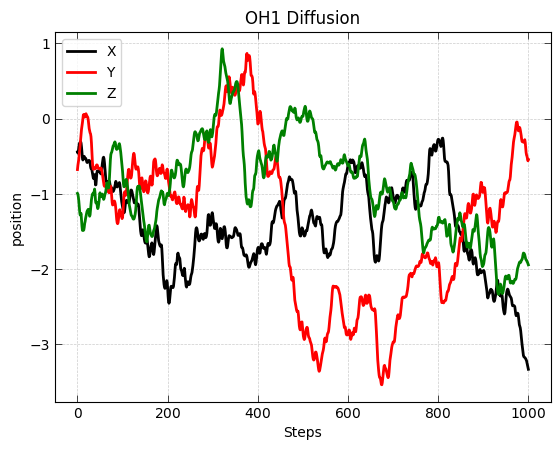

In [21]:
plt.figure()
plt.plot(xoh[:],color='black',linewidth=2,label="X")
plt.plot(yoh[:],color='r',linewidth=2,label="Y")
plt.plot(zoh[:],color='g',linewidth=2,label="Z")
plt.legend(loc="upper left")
plt.xlabel('Steps')
plt.ylabel('position')
plt.title("OH1 Diffusion")
plt.tick_params(axis="x",which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='major',direction="in", length=5, width=0.5)
plt.tick_params(axis="x",which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='minor',direction="in", length=5, width=0.5)
plt.grid(which='major',color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0),useMathText=True)
#plt.ylim([0,80])
plt.tick_params(bottom=True, top=True, left=True, right=True)
#plt.savefig(path +'/oh1.jpg', dpi=400) 

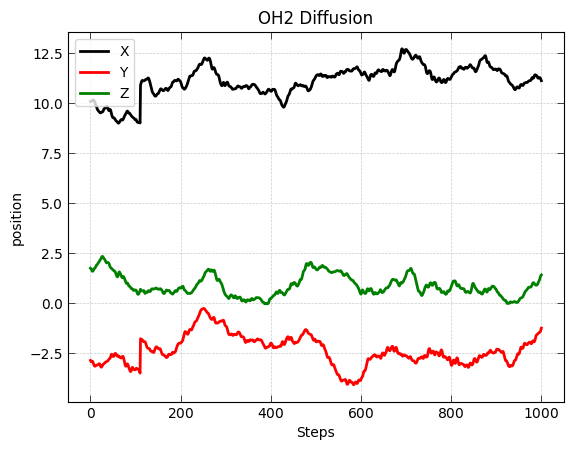

In [22]:
plt.figure()
plt.plot(xoh_2[:],color='black',linewidth=2,label="X")
plt.plot(yoh_2[:],color='r',linewidth=2,label="Y")
plt.plot(zoh_2[:],color='g',linewidth=2,label="Z")
plt.legend(loc="upper left")
plt.xlabel('Steps')
plt.ylabel('position')
plt.title("OH2 Diffusion")
plt.tick_params(axis="x",which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='major',direction="in", length=5, width=0.5)
plt.tick_params(axis="x",which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='minor',direction="in", length=5, width=0.5)
plt.grid(which='major',color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0),useMathText=True)
#plt.ylim([0,80])
plt.tick_params(bottom=True, top=True, left=True, right=True)
#plt.savefig(path +'/oh2.jpg', dpi=400) 

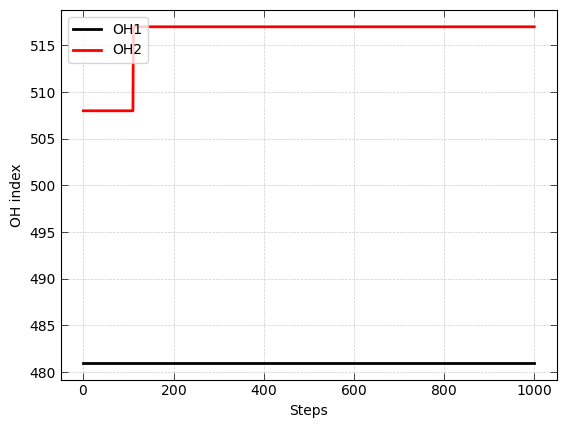

In [23]:
plt.figure()
plt.plot(oh_index[:],color='black',linewidth=2,label="OH1")
plt.plot(oh_index2[:],color='r',linewidth=2,label="OH2")
plt.legend(loc="upper left")
plt.xlabel('Steps')
plt.ylabel('OH index')
plt.tick_params(axis="x",which='major', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='major',direction="in", length=5, width=0.5)
plt.tick_params(axis="x",which='minor', direction="in", length=5, width=0.5)
plt.tick_params(axis="y",which='minor',direction="in", length=5, width=0.5)
plt.grid(which='major',color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.ticklabel_format(axis="x", style="plain", scilimits=(0,0),useMathText=True)
#plt.ylim([0,80])
plt.tick_params(bottom=True, top=True, left=True, right=True)
#plt.savefig(path +'/oh_index.jpg', dpi=400) 